In [16]:
import numpy as np
import datetime as dt
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.stats import norm

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

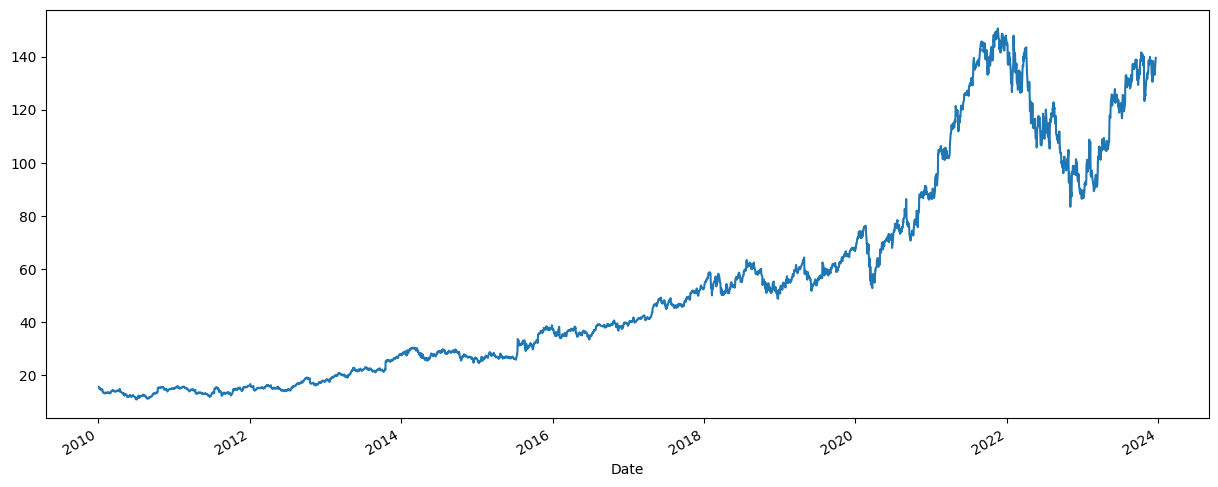

In [17]:
ticker = 'GOOG'
stock_data = yf.download(ticker, '2010-1-1')
stock_data = pd.DataFrame(stock_data)
data = stock_data['Close']
#Plot
data.plot(figsize=(15,6))

/tmp/ipykernel_19570/1046631991.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_return.iloc[1:])


Text(0, 0.5, 'Frequency')

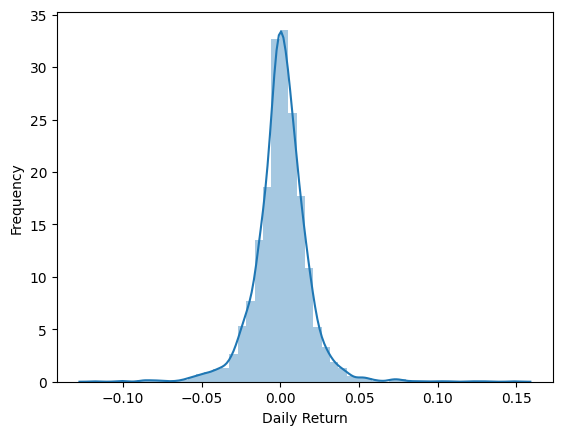

In [18]:
log_return = np.log(1 + data.pct_change())#Plot
sns.distplot(log_return.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")



[[139.66000366 139.66000366 139.66000366 ... 139.66000366 139.66000366
  139.66000366]
 [137.76132685 137.18377202 138.33494374 ... 134.47263912 141.91214936
  138.90548828]
 [136.54916482 134.81520372 137.57553585 ... 137.59400461 138.74103503
  146.37400701]
 ...
 [132.94348744 151.49766339 128.8067579  ... 147.99422837 132.15251105
  172.5387669 ]
 [128.82953127 156.05000569 127.74568632 ... 145.15145408 130.25915583
  174.74391478]
 [128.22016168 154.52494357 127.33279219 ... 141.8831446  128.38796743
  176.45261271]]
100


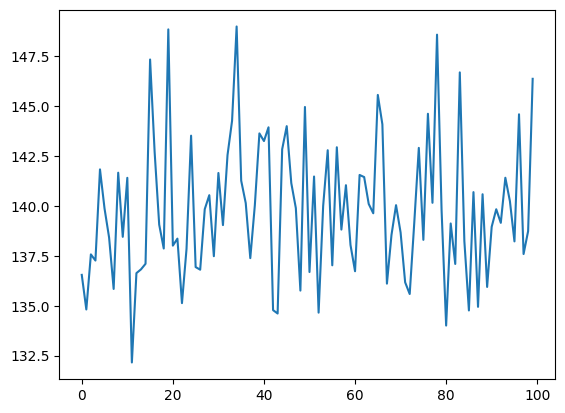

In [37]:
u = log_return.mean()
var = log_return.var()
drift = u - (0.5*var)

stdev = log_return.std()
days = 50
trials = 10000
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift + stdev * Z)

price_paths = np.zeros_like(daily_returns)
price_paths[0] = data.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

# price_paths.plot(figsize=(15,6))
print(price_paths)
for i in range(3):
    plt.plot(price_paths[i])
    print(len(price_paths[i]))
    # print(pp)
plt.show()